# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata, how="left", on='Mouse ID')
merged_data.to_csv('merged_data.csv', index=True)

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [56]:
# Checking the number of mice.
numb_mice = merged_data['Mouse ID'].nunique()
numb_mice

249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ids

array(['g989'], dtype=object)

In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_data.loc[merged_data['Mouse ID'] != 'g989']
clean_merged_df = pd.DataFrame(clean_merged_data)
clean_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice in the clean DataFrame.
numb_mice = clean_merged_data['Mouse ID'].nunique()
numb_mice 

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


tumor_vol_stats = clean_merged_df[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_vol_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

tumor_df['Median Tumor Volume'] = tumor_vol_stats.groupby(["Drug Regimen"]).median()
tumor_df['Tumor Volume Variance'] = tumor_vol_stats.groupby(["Drug Regimen"]).var()
tumor_df['Tumor Volume Std. Dev.'] = tumor_vol_stats.groupby(["Drug Regimen"]).std() 
tumor_df['Tumor Volume Std. Err'] = tumor_vol_stats.groupby(["Drug Regimen"]).sem()
tumor_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

summary_df = pd.DataFrame(summary_statistics)
summary_df = summary_df.style.set_caption('Tumor Volume (mm3)')
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

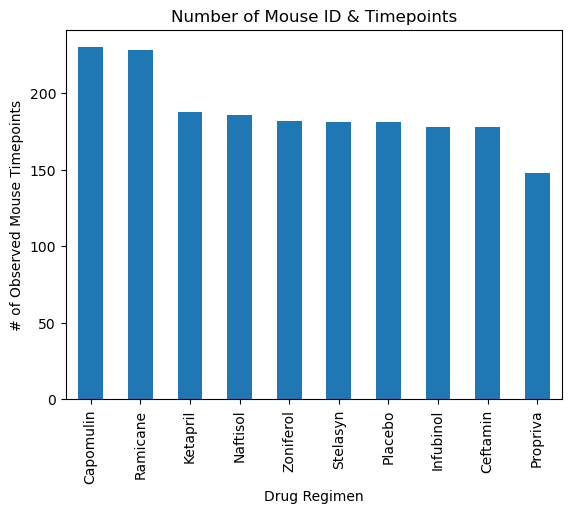

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_merged_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar')
plt.title("Number of Mouse ID & Timepoints")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



In [80]:
#drug_counts

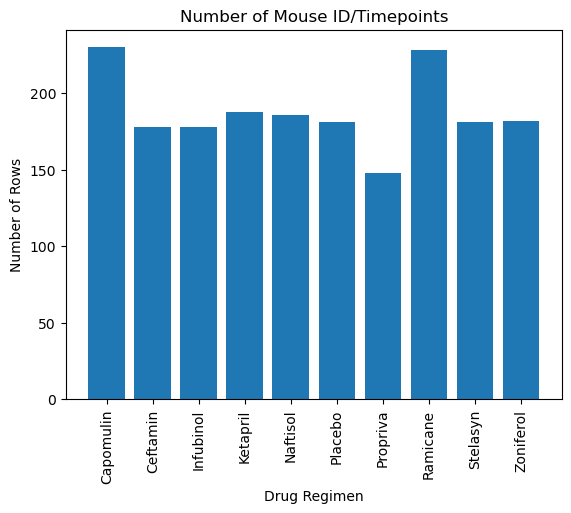

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_merged_df.groupby(['Drug Regimen'])['Timepoint'].count()
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Number of Mouse ID/Timepoints")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()

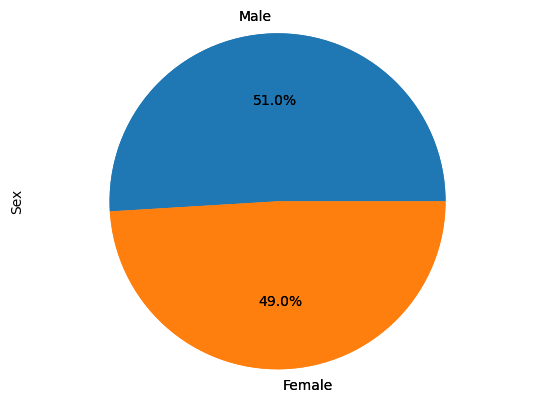

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_gender = clean_merged_df['Sex'].value_counts()
total_gender.plot(kind='pie', autopct='%1.1f%%')
total_gender.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

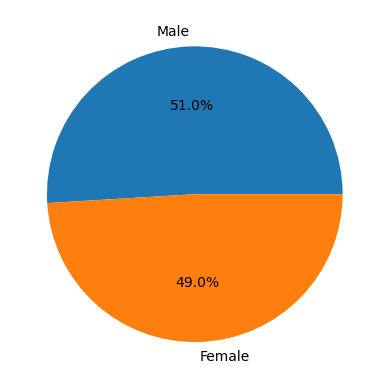

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(total_gender, labels=total_gender.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_merged_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(clean_merged_df, max_timepoints, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
234,a644,45,32.978522,1,Ramicane,Female,7,17
240,i177,45,33.562402,3,Ramicane,Male,10,18
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [70]:
#treatments
#tumor_vol_data

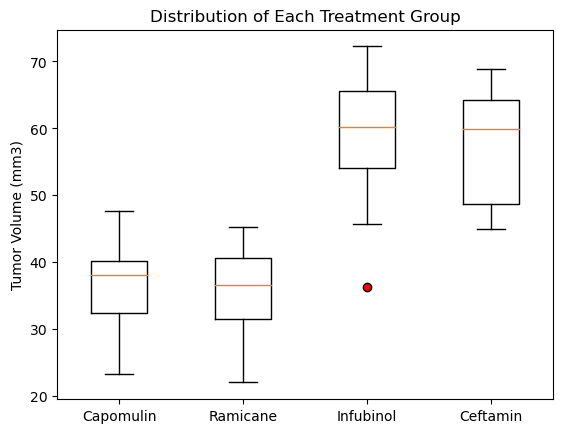

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxpl = plt.boxplot(tumor_vol_data, labels=treatments)
infubinol_index = treatments.index('Infubinol')
outlier_marker = dict(markerfacecolor='red', marker='o')
plt.setp(boxpl['fliers'][infubinol_index], **outlier_marker)

plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Each Treatment Group')
plt.show()

## Line and Scatter Plots

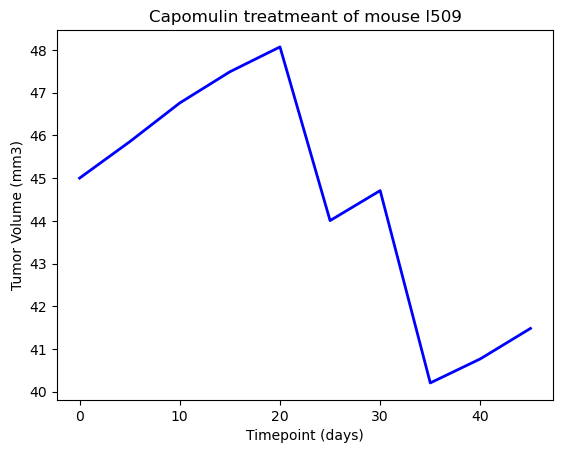

In [72]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_merged_df.loc[clean_merged_df["Mouse ID"] == "l509",:]

x_axis = Capomulin_df["Timepoint"]
tumvol = Capomulin_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumvol,linewidth=2, markersize=15, color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



In [73]:
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


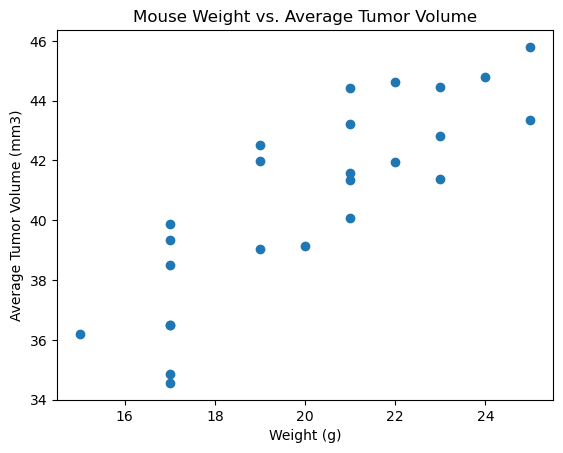

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_weight = clean_merged_df[clean_merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].first()
average_tumor_volume = clean_merged_df[clean_merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


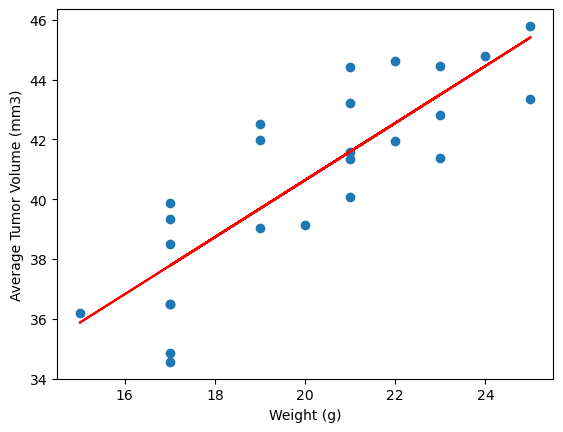

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


average_tumor_volume = clean_merged_df[clean_merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = clean_merged_df[clean_merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].first()

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
rounded_coefficient = round(correlation_coefficient, 2)
print("The correlation between mouse weight and the average tumor volume is", rounded_coefficient)

regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regression_line, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [76]:
#average_tumor_volume

In [77]:
#regression_line